# Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [141]:
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0).squeeze()

In [142]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
80307,0.457839,47,0.0,0.046115,67743.0,12,0.0,1,0.0,0.0,0
30226,0.009027,52,0.0,0.477691,6790.0,16,0.0,2,0.0,0.0,0
133736,0.999900,47,2.0,0.226398,7583.0,4,0.0,1,0.0,2.0,0
37286,0.190475,59,1.0,0.320860,6466.0,6,0.0,1,0.0,1.0,0
6148,0.204319,38,0.0,0.331111,6000.0,14,0.0,2,0.0,2.0,0


In [145]:
X_train["LogMonthlyIncome"] = np.log(X_train["MonthlyIncome"]+1)

<AxesSubplot:xlabel='LogMonthlyIncome', ylabel='Count'>

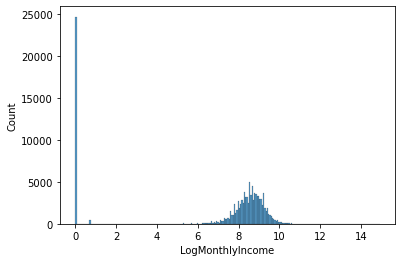

In [146]:
sns.histplot(data=X_train, x="LogMonthlyIncome")

In [6]:
X_train["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_train["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

<AxesSubplot:xlabel='LogLogRevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

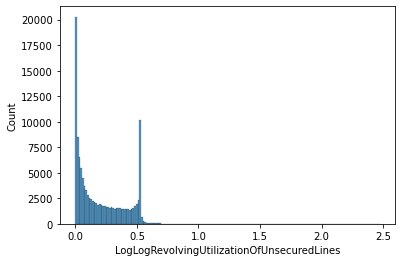

In [7]:
sns.histplot(data=X_train, x="LogLogRevolvingUtilizationOfUnsecuredLines")

In [8]:
X_train["LogDebtRatio"] = np.log(X_train["DebtRatio"]+1e-05)

<AxesSubplot:xlabel='LogDebtRatio', ylabel='Count'>

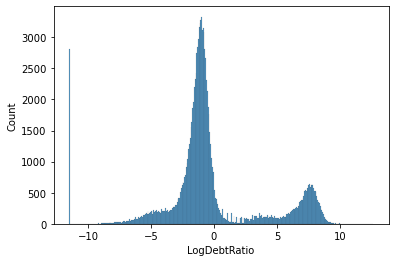

In [9]:
sns.histplot(data=X_train, x="LogDebtRatio")

# 1. Model Ensemble Logistic Regression Modelling

## (1a) Standardizing

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
# Convert X_train & X_test
def scaler_transform(data, scaler):
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

In [12]:
X_train_scaled = scaler_transform(data = X_train,
                                  scaler = scaler)

In [13]:
X_train_scaled

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer,LogMonthlyIncome,LogLogRevolvingUtilizationOfUnsecuredLines,LogDebtRatio
80307,-0.022665,-0.359114,-0.352441,-0.232311,4.359262,0.684016,-0.185818,-0.020921,-0.196823,-0.667284,-0.492793,1.228830,0.563201,-0.735964
30226,-0.024498,-0.019155,-0.352441,-0.232021,0.097846,1.462043,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.579399,-0.953422,-0.144244
133736,-0.020451,-0.359114,2.515175,-0.232190,0.153287,-0.872036,-0.185818,-0.020921,-0.196823,1.136102,-0.492793,0.610582,1.571355,-0.333241
37286,-0.023757,0.456787,1.081367,-0.232126,0.075194,-0.483023,-0.185818,-0.020921,-0.196823,0.234409,-0.492793,0.565596,-0.213128,-0.244976
6148,-0.023700,-0.971039,-0.352441,-0.232120,0.042615,1.073030,-0.185818,0.860418,-0.196823,1.136102,-0.492793,0.544481,-0.165341,-0.237015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,-0.023640,0.660762,-0.352441,-0.232025,0.112528,6.713719,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.587998,-0.115295,-0.147544
85572,-0.020450,0.864737,-0.352441,-0.232341,0.118331,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,-0.492793,0.591325,1.571499,-2.184042
118251,-0.024535,2.768504,-0.352441,-0.226981,-0.376864,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,2.029248,-1.911825,-0.997062,0.569123
95767,-0.021054,0.048836,-0.352441,-0.231911,-0.046734,0.684016,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.476864,1.344946,-0.069429


## (1b) Undersampling

In [147]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [41]:
train_idx = X_train_scaled.index

In [45]:
X_train_scaled

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer,LogMonthlyIncome,LogLogRevolvingUtilizationOfUnsecuredLines,LogDebtRatio
80307,-0.022665,-0.359114,-0.352441,-0.232311,4.359262,0.684016,-0.185818,-0.020921,-0.196823,-0.667284,-0.492793,1.228830,0.563201,-0.735964
30226,-0.024498,-0.019155,-0.352441,-0.232021,0.097846,1.462043,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.579399,-0.953422,-0.144244
133736,-0.020451,-0.359114,2.515175,-0.232190,0.153287,-0.872036,-0.185818,-0.020921,-0.196823,1.136102,-0.492793,0.610582,1.571355,-0.333241
37286,-0.023757,0.456787,1.081367,-0.232126,0.075194,-0.483023,-0.185818,-0.020921,-0.196823,0.234409,-0.492793,0.565596,-0.213128,-0.244976
6148,-0.023700,-0.971039,-0.352441,-0.232120,0.042615,1.073030,-0.185818,0.860418,-0.196823,1.136102,-0.492793,0.544481,-0.165341,-0.237015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,-0.023640,0.660762,-0.352441,-0.232025,0.112528,6.713719,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.587998,-0.115295,-0.147544
85572,-0.020450,0.864737,-0.352441,-0.232341,0.118331,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,-0.492793,0.591325,1.571499,-2.184042
118251,-0.024535,2.768504,-0.352441,-0.226981,-0.376864,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,2.029248,-1.911825,-0.997062,0.569123
95767,-0.021054,0.048836,-0.352441,-0.231911,-0.046734,0.684016,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.476864,1.344946,-0.069429


In [42]:
import random

In [80]:
random.sample(X_train_scaled.columns.to_list(), 2)

['NumberOfTime30-59DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines']

In [155]:
portion = 1
bootstrap_size = int(np.floor(0.3*len(X_train_scaled)))

models = {'class_weight': [],
          'hyperparameter': [],
          'chosen_var': [],
          'best_model': []}

for i in range(100):
    random.seed(i)
    sampled = np.random.choice(train_idx.to_list(), size=bootstrap_size)
    cols = random.sample(X_train_scaled.columns.to_list(), 4)
    
    models['chosen_var'].append(cols)
    
    #sampled = train_idx.to_list()
    X_train_sampled = X_train_scaled.loc[sampled, cols]
    y_train_sampled = y_train.loc[sampled]
    rus = RandomUnderSampler(sampling_strategy = 0.3,
                             random_state = 20230703+i)
    X_res, y_res = rus.fit_resample(X_train_sampled, y_train_sampled)
    
    # gridsearch for hyperparameters
    
    n_samples = len(y_res)
    n_classes = len(y_res.value_counts())
    n_samples_j = y_res.value_counts()
    class_weight = n_samples / (n_classes * n_samples_j)
    
    # append to list in dictionary
    models['class_weight'].append(class_weight)
    
#     logreg = LogisticRegression(class_weight = dict(class_weight),
#                                 solver = "liblinear",
#                                 random_state = 20230703+i)
    
#     search_params = {"penalty": ["l1", "l2"],
#                      "C": np.logspace(-5, 5, 20)}

#     # gridsearch
#     logreg_cv = GridSearchCV(estimator = logreg,
#                              param_grid = search_params,
#                              cv = 5)    
#     logreg_cv.fit(X = X_res,
#                   y = y_res)
    
#     models['hyperparameter'].append(logreg_cv.best_params_)
    
    # fitting best model
#     logreg_best = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
#                                      C = logreg_cv.best_params_["C"],
#                                      class_weight = dict(class_weight),
#                                      solver = "liblinear",
#                                      random_state = 20230703+i)
    
#     logreg_best = LogisticRegression(class_weight = dict(class_weight),
#                                      solver = "liblinear",
#                                      random_state = 20230703+i)
    
    tree_best = DecisionTreeClassifier(class_weight = dict(class_weight),
                                       random_state = 20230703+i,
                                       max_depth = 5)

    tree_best.fit(X_res, y_res)
    
    models['best_model'].append(tree_best)

In [156]:
def predict_proba_avg(X, models):
    
    y_pred_proba_list = []
    
    for i, model in enumerate(models['best_model']):
        y_pred_proba = model.predict_proba(X[models['chosen_var'][i]])
        y_pred_proba_list.append(y_pred_proba)
        
    y_pred_proba_avg = np.mean(y_pred_proba_list, axis = 0)
    
    return y_pred_proba_avg

In [157]:
y_train_pred_proba = predict_proba_avg(X_train_scaled, models)

In [158]:
y_train_pred_proba

array([[0.62743609, 0.37256391],
       [0.69716294, 0.30283706],
       [0.37279057, 0.62720943],
       ...,
       [0.765616  , 0.234384  ],
       [0.444203  , 0.555797  ],
       [0.7984482 , 0.2015518 ]])

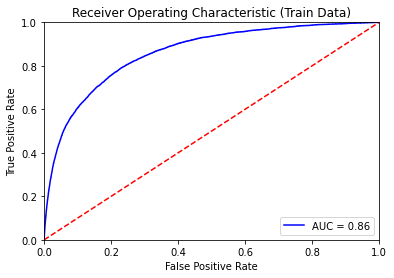

In [159]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_train_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Train Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
X_test = pd.read_csv("X_test.csv", index_col=0)
y_test = pd.read_csv("y_test.csv", index_col=0).squeeze()

X_test["LogMonthlyIncome"] = np.log(X_test["MonthlyIncome"]+1)

X_test["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_test["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_test["LogDebtRatio"] = np.log(X_test["DebtRatio"]+1e-05)

X_test_scaled = scaler_transform(data = X_test,
                                 scaler = scaler)

y_test_pred_proba = predict_proba_avg(X_test_scaled, models)

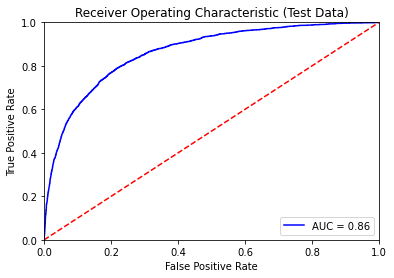

In [161]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_test_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Test Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
y_pred_test = (y_test_pred_proba[:,1] >= 0.5)

In [163]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["Approved", "Rejected"]))

              precision    recall  f1-score   support

    Approved       0.98      0.80      0.88     27877
    Rejected       0.22      0.77      0.34      2002

    accuracy                           0.80     29879
   macro avg       0.60      0.78      0.61     29879
weighted avg       0.93      0.80      0.84     29879



In [164]:
y_pred_train = (y_train_pred_proba[:,1] >= 0.5)

In [165]:
# Classification report

print(classification_report(y_true = y_train,
                            y_pred = y_pred_train,
                            target_names = ["Approved", "Rejected"]))

              precision    recall  f1-score   support

    Approved       0.98      0.80      0.88    111505
    Rejected       0.21      0.76      0.33      8007

    accuracy                           0.79    119512
   macro avg       0.60      0.78      0.61    119512
weighted avg       0.93      0.79      0.84    119512



In [177]:
X_validation = pd.read_csv("cs-test.csv")
X_validation.drop(columns=["Unnamed: 0", "SeriousDlqin2yrs"], 
                  inplace=True)
X_validation.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [178]:
null_income = X_validation["MonthlyIncome"].isna()
X_validation["TypeCustomer"] = np.where(null_income, 1, 0)
# 1 is Business
# 0 is Personal
X_validation["MonthlyIncome"] = X_validation["MonthlyIncome"].fillna(0) # fill 0 income for Business

X_validation["NumberOfDependents"] = X_validation["NumberOfDependents"].fillna(0) # impute missing values

In [179]:
# num_30_past_mode = float(X_validation["NumberOfTime30-59DaysPastDueNotWorse"].mode())
# col = "NumberOfTime30-59DaysPastDueNotWorse"

# for dataset in [X_validation]:
#     dataset[col] = np.where(dataset[col] > 20,
#                             num_30_past_mode, 
#                             dataset[col])

In [180]:
# num_60_past_mode = float(X_validation["NumberOfTime60-89DaysPastDueNotWorse"].mode())
# col = "NumberOfTime60-89DaysPastDueNotWorse"

# for dataset in [X_validation]:
#     dataset[col] = np.where(dataset[col] > 20,
#                             num_60_past_mode, 
#                             dataset[col])

In [181]:
# num_90_past_mode = float(X_train["NumberOfTimes90DaysLate"].mode())
# col ="NumberOfTimes90DaysLate"

# for dataset in [X_validation]:
#     dataset[col] = np.where(dataset[col] > 20,
#                             num_90_past_mode, 
#                             dataset[col])

In [182]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  int64  
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 9   NumberOfDependents                    101503 non-null  float64
 10  TypeCustomer                          101503 non-null  int32  
dtype

In [183]:
X_validation["LogMonthlyIncome"] = np.log(X_validation["MonthlyIncome"]+1)

X_validation["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_validation["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_validation["LogDebtRatio"] = np.log(X_validation["DebtRatio"]+1e-05)

X_validation_scaled = scaler_transform(data = X_validation, scaler = scaler)

y_validation_pred_proba = predict_proba_avg(X_validation_scaled, models)[:,1]

In [184]:
y_validation_pred_proba

array([0.5555658 , 0.42861633, 0.33533223, ..., 0.2231257 , 0.44951043,
       0.4562618 ])

In [185]:
validation_proba = pd.Series(y_validation_pred_proba)
validation_proba.index = pd.RangeIndex(start=1, stop=101504, step=1)

In [186]:
validation_proba.to_csv("validation_3.csv")

In [187]:
validation_proba

1         0.555566
2         0.428616
3         0.335332
4         0.527893
5         0.591027
            ...   
101499    0.434555
101500    0.710469
101501    0.223126
101502    0.449510
101503    0.456262
Length: 101503, dtype: float64

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119512 entries, 80307 to 140296
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines        119512 non-null  float64
 1   age                                         119512 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse        119512 non-null  float64
 3   DebtRatio                                   119512 non-null  float64
 4   MonthlyIncome                               119512 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans             119512 non-null  int64  
 6   NumberOfTimes90DaysLate                     119512 non-null  float64
 7   NumberRealEstateLoansOrLines                119512 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse        119512 non-null  float64
 9   NumberOfDependents                          119512 non-null  float

In [112]:
for i, val in enumerate(logreg_best.coef_.T):
    print(f'{X_train.columns[i]}: {logreg_best.coef_[0,i]}')

RevolvingUtilizationOfUnsecuredLines: -0.3840314873017878
age: -0.2795047219051406
NumberOfTime30-59DaysPastDueNotWorse: 0.39604508671394784
DebtRatio: -0.052928613849725026
MonthlyIncome: -0.24098178628686456
NumberOfOpenCreditLinesAndLoans: 0.17842700494414193
NumberOfTimes90DaysLate: 0.5229993257098962
NumberRealEstateLoansOrLines: 0.1568471435219585
NumberOfTime60-89DaysPastDueNotWorse: 0.3280935134635366
NumberOfDependents: 0.022295465000570416
TypeCustomer: -0.0584235123633506
LogMonthlyIncome: -0.1676437916998922
LogLogRevolvingUtilizationOfUnsecuredLines: 0.8099070825793486
LogDebtRatio: -0.19470619790504867


In [111]:
logreg_best.coef_

array([[-0.38403149, -0.27950472,  0.39604509, -0.05292861, -0.24098179,
         0.178427  ,  0.52299933,  0.15684714,  0.32809351,  0.02229547,
        -0.05842351, -0.16764379,  0.80990708, -0.1947062 ]])